In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pickle5 as pickle

from cult.config import LOG_PATH


In [ ]:
write_data = False

# Load TB Data to DataFrame

In [ ]:
def tabulate_events(dpath):

    final_out = {}
    for i, dir_name in enumerate(os.listdir(dpath)):
        print(f"Converting run {dir_name}",end="")
        event_path = os.listdir(os.path.join(dpath, dir_name))[0]
        ea = EventAccumulator(os.path.join(dpath, dir_name, event_path)).Reload()
        tags = ea.Tags()['scalars']

        out = {}

        for tag in tags:
            tag_values=[]
            wall_time=[]
            steps=[]

            for event in ea.Scalars(tag):
                tag_values.append(event.value)
                wall_time.append(event.wall_time)
                steps.append(event.step)

            out[tag]=pd.DataFrame(data=dict(zip(steps,np.array([tag_values,wall_time]).transpose())), columns=steps,index=['value','wall_time'])

        if len(tags)>0:      
            df= pd.concat(out.values(),keys=out.keys())
            print("- Done")
        else:
            print('- Not scalers to write')

        final_out[dir_name] = df


    return final_out

In [ ]:
if write_data:
    steps = tabulate_events(LOG_PATH)
    df = pd.concat(steps.values(),keys=steps.keys())
    df.to_pickle('all_results.pkl')

In [ ]:
with open('all_results.pkl', "rb") as fh:
  df = pickle.load(fh)


# Fashion MNIST / MNIST Latent Classification Training Curves

### Extract and Format Data

In [ ]:
df = df.transpose()

In [ ]:
df

fash_to_mnist_2                                                           \
          train/loss               train/rec_loss               train/kl_loss   
               value     wall_time          value     wall_time         value   
3        1094.739990  1.657652e+09     545.927246  1.657652e+09      0.073544   
6        1088.896484  1.657652e+09     540.252991  1.657652e+09      0.356362   
8        1085.322266  1.657652e+09     536.580078  1.657652e+09      0.499687   
9        1083.227905  1.657652e+09     533.928650  1.657652e+09      0.588115   
11       1080.057129  1.657652e+09     530.620850  1.657652e+09      0.497787   
...              ...           ...            ...           ...           ...   
4579             NaN           NaN            NaN           NaN           NaN   
4519             NaN           NaN            NaN           NaN           NaN   
7614             NaN           NaN            NaN           NaN           NaN   
2214             NaN           NaN            NaN           NaN           NaN   
20               NaN           NaN            NaN           NaN           NaN   

                                                                      \
                   train/e_prox_loss               train/d_prox_loss   
         wall_time             value     wall_time             value   
3     1.657652e+09          5.381583  1.657652e+09        543.357666   
6     1.657652e+09          5.275781  1.657652e+09        543.011414   
8     1.657652e+09          5.205933  1.657652e+09        543.036621   
9     1.657652e+09          5.276175  1.657652e+09        543.434937   
11    1.657652e+09          5.227664  1.657652e+09        543.710754   
...            ...               ...           ...               ...   
4579           NaN               NaN           NaN               NaN   
4519           NaN               NaN           NaN               NaN   
7614           NaN               NaN           NaN               NaN   
2214           NaN               NaN           NaN               NaN   
20             NaN               NaN           NaN               NaN   

                    ...           mnist_to_fash_2            \
                    ... classifiers/fashion_mnist             
         wall_time  ...                     value wall_time   
3     1.657652e+09  ...                       NaN       NaN   
6     1.657652e+09  ...                       NaN       NaN   
8     1.657652e+09  ...                       NaN       NaN   
9     1.657652e+09  ...                       NaN       NaN   
11    1.657652e+09  ...                       NaN       NaN   
...            ...  ...                       ...       ...   
4579           NaN  ...                       NaN       NaN   
4519           NaN  ...                       NaN       NaN   
7614           NaN  ...                       NaN       NaN   
2214           NaN  ...                       NaN       NaN   
20             NaN  ...                       NaN       NaN   

                                                                     \
     eval/fashion_rec_loss           eval/mnist_recc_loss             
                     value wall_time                value wall_time   
3                      NaN       NaN                  NaN       NaN   
6                      NaN       NaN                  NaN       NaN   
8                      NaN       NaN                  NaN       NaN   
9                      NaN       NaN                  NaN       NaN   
11                     NaN       NaN                  NaN       NaN   
...                    ...       ...                  ...       ...   
4579                   NaN       NaN                  NaN       NaN   
4519                   NaN       NaN                  NaN       NaN   
7614                   NaN       NaN                  NaN       NaN   
2214                   NaN       NaN                  NaN       NaN   
20                     NaN       NaN                  N

In [ ]:
fashion_mnist_df = df.xs(key='classifiers/fashion_mnist', level=1, axis=1).xs(key='value', level=1, axis=1)

In [ ]:
fashion_mnist_df

,fash_to_mnist_2,fixed_fash_to_mnist_1,fash_to_mnist_4,fash_to_mnist_3,fixed_fash_to_mnist_0,no_replay_fash_to_mnist_4,no_replay_fash_to_mnist_3,no_replay_fash_to_mnist_2,mnist_to_fash_0,mnist_to_fash_1,fash_to_mnist_1,fixed_fash_to_mnist_2,fash_to_mnist_0,fixed_fash_to_mnist_3,fixed_fash_to_mnist_4,no_replay_fash_to_mnist_0,no_replay_fash_to_mnist_1,mnist_to_fash_3,mnist_to_fash_4,mnist_to_fash_2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fashion_mnist_df.reset_index(inplace=True)
fashion_mnist_df.rename(columns={'index': 'step'}, inplace=True)

In [ ]:
fashion_mnist_df

,step,fash_to_mnist_2,fixed_fash_to_mnist_1,fash_to_mnist_4,fash_to_mnist_3,fixed_fash_to_mnist_0,no_replay_fash_to_mnist_4,no_replay_fash_to_mnist_3,no_replay_fash_to_mnist_2,mnist_to_fash_0,...,fash_to_mnist_1,fixed_fash_to_mnist_2,fash_to_mnist_0,fixed_fash_to_mnist_3,fixed_fash_to_mnist_4,no_replay_fash_to_mnist_0,no_replay_fash_to_mnist_1,mnist_to_fash_3,mnist_to_fash_4,mnist_to_fash_2
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,4579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18748,4519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18749,7614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18750,2214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fashion_mnist_df = fashion_mnist_df.melt(id_vars=['step'])
fashion_mnist_df

,step,variable,value
0,3,fash_to_mnist_2,NaN
1,6,fash_to_mnist_2,NaN
2,8,fash_to_mnist_2,NaN
3,9,fash_to_mnist_2,NaN
4,11,fash_to_mnist_2,NaN
...,...,...,...
375035,4579,mnist_to_fash_2,NaN
375036,4519,mnist_to_fash_2,NaN
375037,7614,mnist_to_fash_2,NaN
375038,2214,mnist_to_fash_2,NaN


In [ ]:
fashion_mnist_df.rename(columns={'variable': 'train regime'}, inplace=True)
fashion_mnist_df.rename(columns={'value': 'accuracy'}, inplace=True)
fashion_mnist_df

,step,train regime,accuracy
0,3,fash_to_mnist_2,NaN
1,6,fash_to_mnist_2,NaN
2,8,fash_to_mnist_2,NaN
3,9,fash_to_mnist_2,NaN
4,11,fash_to_mnist_2,NaN
...,...,...,...
375035,4579,mnist_to_fash_2,NaN
375036,4519,mnist_to_fash_2,NaN
375037,7614,mnist_to_fash_2,NaN
375038,2214,mnist_to_fash_2,NaN


In [ ]:
fashion_mnist_df

,step,train regime,accuracy
0,3,fash_to_mnist_2,NaN
1,6,fash_to_mnist_2,NaN
2,8,fash_to_mnist_2,NaN
3,9,fash_to_mnist_2,NaN
4,11,fash_to_mnist_2,NaN
...,...,...,...
375035,4579,mnist_to_fash_2,NaN
375036,4519,mnist_to_fash_2,NaN
375037,7614,mnist_to_fash_2,NaN
375038,2214,mnist_to_fash_2,NaN


In [ ]:
fashion_mnist_df['train regime'] = fashion_mnist_df['train regime'].apply(lambda x: "_".join(x.split('_')[:-1]))

In [ ]:
fashion_mnist_df

,step,train regime,accuracy
0,3,fash_to_mnist,NaN
1,6,fash_to_mnist,NaN
2,8,fash_to_mnist,NaN
3,9,fash_to_mnist,NaN
4,11,fash_to_mnist,NaN
...,...,...,...
375035,4579,mnist_to_fash,NaN
375036,4519,mnist_to_fash,NaN
375037,7614,mnist_to_fash,NaN
375038,2214,mnist_to_fash,NaN


In [ ]:
fashion_mnist_df = fashion_mnist_df[~fashion_mnist_df['accuracy'].isnull().values]

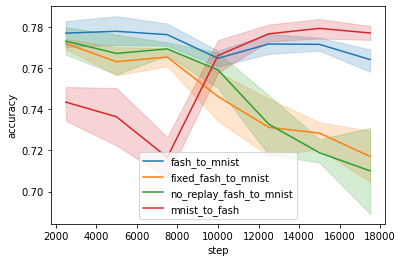

In [ ]:
sns.lineplot(x="step", y="accuracy", hue="train regime", data=fashion_mnist_df)
plt.legend(loc='lower center')


In [ ]:
regime_map = {
    'fash_to_mnist': 'CULT F to M', 
    'fixed_fash_to_mnist': 'Gen Replay F to M',
    'no_replay_fash_to_mnist': 'No Replay F to M',
    'mnist_to_fash': 'CULT M to F'
}

In [ ]:
def get_metric_df(df, metric):
    # transpose dataframe
    df = df.transpose()
    
    # index into values of metric
    metric_df = df.xs(key=metric, level=1, axis=1).xs(key='value', level=1, axis=1)

    # add step as column
    metric_df.reset_index(inplace=True)
    metric_df.rename(columns={'index': 'step'}, inplace=True)

    # make run name a column, and remove index from end 
    metric_df = metric_df.melt(id_vars=['step'])
    metric_df.rename(columns={'variable': 'train regime'}, inplace=True)
    metric_df['train regime'] = metric_df['train regime'].apply(lambda x: "_".join(x.split('_')[:-1]))
    metric_df['train regime'] = metric_df['train regime'].apply(lambda x: regime_map[x])

    #remove nan values
    metric_df = metric_df[~metric_df['value'].isnull().values]

    return metric_df

In [ ]:
df = df.T

In [ ]:
mnist_metric_df = get_metric_df(df, 'classifiers/mnist')

In [ ]:
mnist_metric_df

,step,train regime,value
1348,2500,CULT F to M,0.7846
5336,10000,CULT F to M,0.8096
7988,15000,CULT F to M,0.8841
9309,17500,CULT F to M,0.8776
11259,5000,CULT F to M,0.7629
...,...,...,...
364276,15000,CULT M to F,0.8670
365597,17500,CULT M to F,0.8785
367547,5000,CULT M to F,0.8951
368182,7500,CULT M to F,0.8932


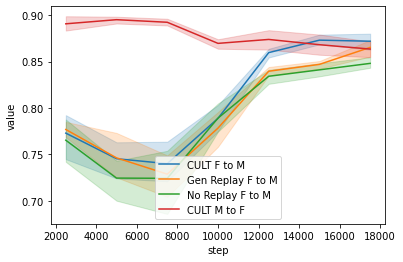

In [ ]:
sns.lineplot(x="step", y="value", hue="train regime", data=mnist_metric_df)
plt.legend(loc='lower center')

In [ ]:
mnist_metric_df = get_metric_df(df, 'classifiers/mnist')
fmnist_metric_df = get_metric_df(df, 'classifiers/fashion_mnist')

In [ ]:
mnist_metric_df['domain'] = 'mnist'
fmnist_metric_df['domain'] = 'fashion_mnist'

In [ ]:
classif_df = pd.concat([mnist_metric_df, fmnist_metric_df])

In [ ]:
classif_df.rename(columns={'value': 'accuracy'}, inplace=True)

In [ ]:
classif_df

,step,train regime,accuracy,domain
1348,2500,CULT F to M,0.7846,mnist
5336,10000,CULT F to M,0.8096,mnist
7988,15000,CULT F to M,0.8841,mnist
9309,17500,CULT F to M,0.8776,mnist
11259,5000,CULT F to M,0.7629,mnist
...,...,...,...,...
364276,15000,CULT M to F,0.7866,fashion_mnist
365597,17500,CULT M to F,0.7736,fashion_mnist
367547,5000,CULT M to F,0.7150,fashion_mnist
368182,7500,CULT M to F,0.7022,fashion_mnist


In [ ]:
sns.set()

(0.5, 1.0)

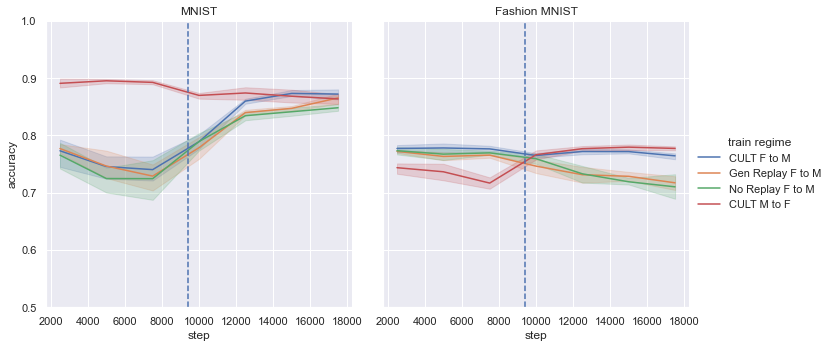

In [ ]:
g = sns.relplot(data=classif_df, x='step', y='accuracy', col='domain', hue='train regime', kind='line')
g.axes[0][0].set_title('MNIST')
g.axes[0][1].set_title('Fashion MNIST')
g.axes[0][0].axvline(9389, 0, 1, linestyle='--')
g.axes[0][1].axvline(9389, 0, 1, linestyle='--')
g.axes[0][0].set_ylim(0.5, 1)

#plt.axvline(9380, 0, 1)

# Atypicality, KL Divergence, and Reconstruction Loss Training Curves

In [ ]:
kl_df = get_metric_df(df, 'train/kl_loss')
atyp_df = get_metric_df(df, 'train/atypicality')
rec_df = get_metric_df(df, 'train/rec_loss')

In [ ]:
kl_df['metric'] = 'kl divergence'
atyp_df['metric'] = 'atypicality'
rec_df['metric'] = 'reconstruction loss'

In [ ]:
ood_df = pd.concat([kl_df, atyp_df, rec_df])

In [ ]:
ood_df

,step,train regime,value,metric
0,3,CULT F to M,0.073544,kl divergence
1,6,CULT F to M,0.356362,kl divergence
2,8,CULT F to M,0.499687,kl divergence
3,9,CULT F to M,0.588115,kl divergence
4,11,CULT F to M,0.497787,kl divergence
...,...,...,...,...
366283,18753,CULT M to F,260.896637,reconstruction loss
366284,18756,CULT M to F,268.211578,reconstruction loss
366285,18757,CULT M to F,270.534241,reconstruction loss
366286,18758,CULT M to F,281.900238,reconstruction loss


Text(43.06235868055556, 0.5, 'Reconstruction Loss')

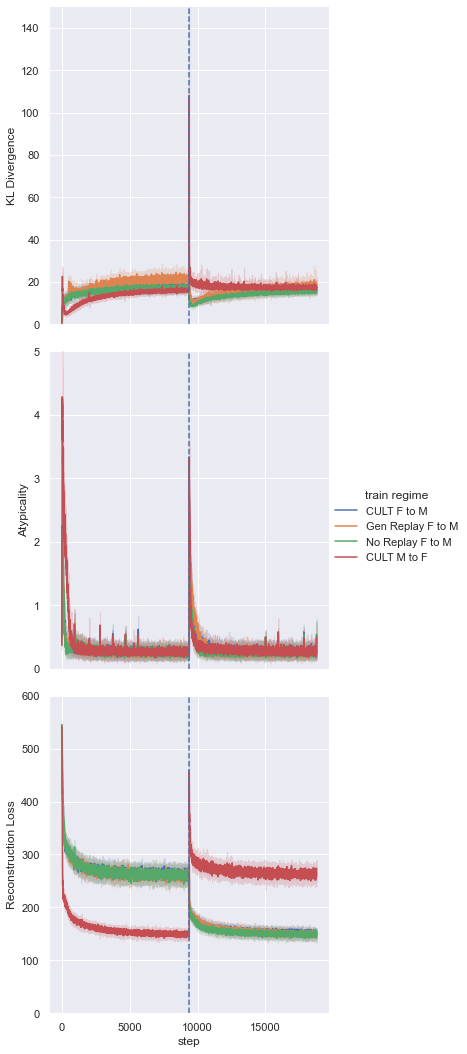

In [ ]:
g = sns.relplot(data=ood_df, x='step', y='value', hue='train regime', row='metric', kind='line', ci='sd', facet_kws=dict(sharey=False))

g.axes[0][0].set_ylim(0, 150)
g.axes[1][0].set_ylim(0, 5)
g.axes[2][0].set_ylim(0, 600)

for i in range(3):
    g.axes[i][0].set_title('')

g.axes[0][0].axvline(9389, 0, 1, linestyle='--')
g.axes[1][0].axvline(9389, 0, 1, linestyle='--')
g.axes[2][0].axvline(9389, 0, 1, linestyle='--')


g.axes[0][0].set_ylabel('KL Divergence')
g.axes[1][0].set_ylabel('Atypicality')
g.axes[2][0].set_ylabel('Reconstruction Loss')

# Final Reconstruction Losses

In [ ]:
f_rec_df = get_metric_df(df, 'eval/fashion_rec_loss')
m_rec_df = get_metric_df(df, 'eval/mnist_recc_loss')

In [ ]:
f_rec_df['domain'] = 'Fashion MNIST'
m_rec_df['domain'] = 'MNIST'

In [ ]:
rec_loss_df = pd.concat([f_rec_df, m_rec_df])

In [ ]:
rec_loss_df

,step,train regime,value,domain
16734,0,CULT F to M,269.554230,Fashion MNIST
35486,0,Gen Replay F to M,618.955688,Fashion MNIST
54238,0,CULT F to M,263.026886,Fashion MNIST
72990,0,CULT F to M,265.034729,Fashion MNIST
91742,0,Gen Replay F to M,630.923401,Fashion MNIST
110494,0,No Replay F to M,675.615601,Fashion MNIST
129246,0,No Replay F to M,644.697327,Fashion MNIST
147998,0,No Replay F to M,705.304749,Fashion MNIST
166750,0,CULT M to F,251.424973,Fashion MNIST
185502,0,CULT M to F,251.790268,Fashion MNIST


Text(0, 0.5, 'Reconstruction Loss')

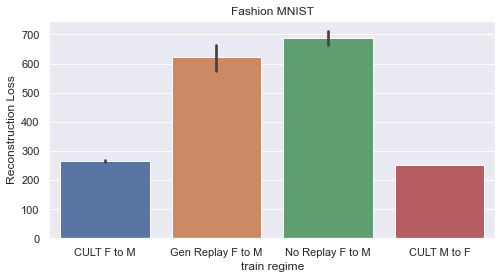

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
g = sns.barplot(data=f_rec_df, x='train regime', y='value')
g.set_title('Fashion MNIST')
g.set_ylabel('Reconstruction Loss')

Text(0, 0.5, 'Reconstruction Loss')

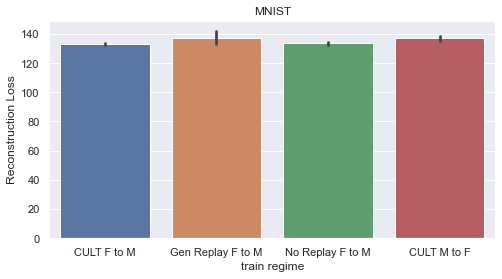

In [ ]:
g = sns.barplot(data=m_rec_df, x='train regime', y='value')
g.set_title('MNIST')
g.set_ylabel('Reconstruction Loss')